In [13]:
import numpy as np
import matplotlib
import matplotlib.colors as colors

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

import protfasta
from sparrow import Protein

BUILD_DATA = False

In [15]:

if BUILD_DATA:
    from yeastevo import Pillars

    fungi_matrix = Pillars()

    abf1_orthologz = fungi_matrix.get_aligned_scerevisiae_sequences('YKL112W')

    ordered_names = ['YKL112W_Egossypii_ABL051W', 
     'YKL112W_Klactis_KLLA0F02970g',
     'YKL112W_Lkluyveri_SAKL0E03278g',
     'YKL112W_Lthermotolerans_KLTH0D05148g',
     'YKL112W_Lwaltii_Kwal_26.7699',
     'YKL112W_Tdelbrueckii_TDEL0A02360',
     'YKL112W_Zrouxii_ZYRO0G02926g',
     'YKL112W_Tblattae_TBLA0I01280',
     'YKL112W_Tphaffii_TPHA0G03020',
     'YKL112W_Vpolyspora_Kpol_467.12',
     'YKL112W_Knaganishii_KNAG0E02510',
     'YKL112W_Kafricana_KAFR0A00650',
     'YKL112W_Ndairenensis_NDAI0K01500',
     'YKL112W_Ncastellii_NCAS0A04470',
     'YKL112W_Cglabrata_CAGL0J01177g',
     'YKL112W_Smikatae_Smik_11.129',
     'YKL112W_Skudriavzevii_Skud_11.117',
     'YKL112W_Suvarum_Suva_11.112',
     'YKL112W_Scerevisiae_YKL112W']

    
    aligned_orthologs = {}
    for i in ordered_names[::-1]:
        aligned_orthologs[i] = abf1_orthologz[i]

    protfasta.write_fasta(aligned_orthologs, 'output_data/aligned_orthologs.fasta')
else:
    aligned_orthologs = protfasta.read_fasta('output_data/aligned_orthologs.fasta', alignment=True)

In [11]:
idr2_start = 594
idr2_end = 1089        

In [16]:

all_seqs = []
all_idr2_seqs = []
pos=1
for i in aligned_orthologs:
    ls = abf1_orthologz[i]
    
    local_seq_vector = []
    local_idr2_vector = []
    idx = 0
    for d in ls:

        
        if d == '-':
            local_seq_vector.append(-1)
            local_idr2_vector.append(-1)
        else:
            if idx >= idr2_start and idx <= idr2_end:
                local_idr2_vector.append(pos)
                local_seq_vector.append(-1)
            else:
                local_idr2_vector.append(-1)
                local_seq_vector.append(pos)
                
        idx = idx +1
    all_seqs.append(local_seq_vector)
    all_idr2_seqs.append(local_idr2_vector)
    print(f'{i, pos}')
    pos = pos + 0.05

                
        

('YKL112W_Scerevisiae_YKL112W', 1)
('YKL112W_Suvarum_Suva_11.112', 1.05)
('YKL112W_Skudriavzevii_Skud_11.117', 1.1)
('YKL112W_Smikatae_Smik_11.129', 1.1500000000000001)
('YKL112W_Cglabrata_CAGL0J01177g', 1.2000000000000002)
('YKL112W_Ncastellii_NCAS0A04470', 1.2500000000000002)
('YKL112W_Ndairenensis_NDAI0K01500', 1.3000000000000003)
('YKL112W_Kafricana_KAFR0A00650', 1.3500000000000003)
('YKL112W_Knaganishii_KNAG0E02510', 1.4000000000000004)
('YKL112W_Vpolyspora_Kpol_467.12', 1.4500000000000004)
('YKL112W_Tphaffii_TPHA0G03020', 1.5000000000000004)
('YKL112W_Tblattae_TBLA0I01280', 1.5500000000000005)
('YKL112W_Zrouxii_ZYRO0G02926g', 1.6000000000000005)
('YKL112W_Tdelbrueckii_TDEL0A02360', 1.6500000000000006)
('YKL112W_Lwaltii_Kwal_26.7699', 1.7000000000000006)
('YKL112W_Lthermotolerans_KLTH0D05148g', 1.7500000000000007)
('YKL112W_Lkluyveri_SAKL0E03278g', 1.8000000000000007)
('YKL112W_Klactis_KLLA0F02970g', 1.8500000000000008)
('YKL112W_Egossypii_ABL051W', 1.9000000000000008)


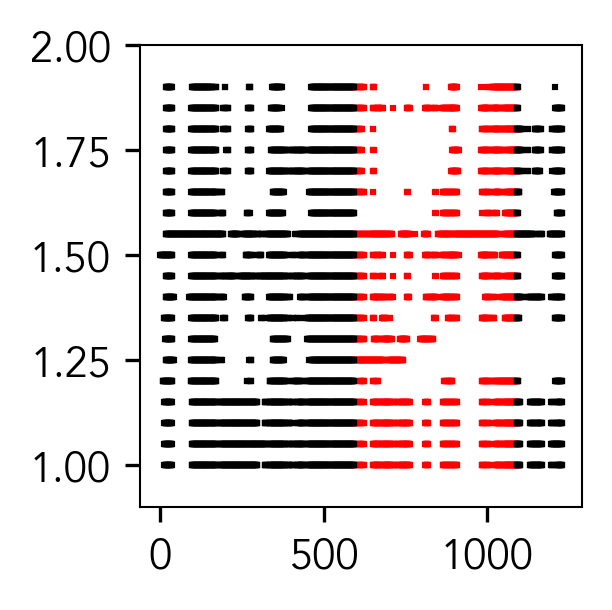

In [18]:
figure(num=None, figsize=(1.9, 2), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()

for i in range(len(all_idr2_seqs)):
    
    plt.plot(all_idr2_seqs[i],'rs', markersize=0.5)
    plt.plot(all_seqs[i],'ks',markersize=0.5)


plt.ylim([0.9,2])
plt.savefig('figures/alignment_schematic_2c.pdf')


In [20]:
ortholog_sequences = {}

for i in aligned_orthologs:
    ls = aligned_orthologs[i]
    ortholog_sequences[i] = ls.replace('-','')
    print(i)
    Protein(ortholog_sequences[i]).show_sequence(blocksize=700)

protfasta.write_fasta(ortholog_sequences,'output_data/unaligned_orthologs.fasta')


YKL112W_Scerevisiae_YKL112W


YKL112W_Suvarum_Suva_11.112


YKL112W_Skudriavzevii_Skud_11.117


YKL112W_Smikatae_Smik_11.129


YKL112W_Cglabrata_CAGL0J01177g


YKL112W_Ncastellii_NCAS0A04470


YKL112W_Ndairenensis_NDAI0K01500


YKL112W_Kafricana_KAFR0A00650


YKL112W_Knaganishii_KNAG0E02510


YKL112W_Vpolyspora_Kpol_467.12


YKL112W_Tphaffii_TPHA0G03020


YKL112W_Tblattae_TBLA0I01280


YKL112W_Zrouxii_ZYRO0G02926g


YKL112W_Tdelbrueckii_TDEL0A02360


YKL112W_Lwaltii_Kwal_26.7699


YKL112W_Lthermotolerans_KLTH0D05148g


YKL112W_Lkluyveri_SAKL0E03278g


YKL112W_Klactis_KLLA0F02970g


YKL112W_Egossypii_ABL051W
